综述：

算法的流程为：  
1. 给出待预测的x
2. 计算权重矩阵
3. 求解theta
4. 给出预测值

其中
权重矩阵采用高斯核
$$w(i) = exp\Big(\frac{(x^{(i)}-x_{predict})^2}{-2\gamma^2}\Big)$$
theta值为
$$\theta=(X^TWX)^{-1}X^TWy$$

In [125]:
import numpy as np
class LWLR():
    def __init__(self,gamma=0.01):
        """初始化LWLR模型"""
        self.X_train= None #非参数学习算法，需要保留X_train
        self.y_train= None #非参数学习算法，需要保留y_train
        self.gamma = gamma
        
    def fit(self,X_train,y_train):
        self.X_train = np.hstack([np.ones((len(X_train),1)),X_train])
        self.y_train = y_train
        return self
    
    def _predict(self,data):
        """给一条待预测样本，返回一条预测结果"""
        data = np.hstack([1,data])
        w = np.exp(np.sum((self.X_train - data)**2,axis=1)/(-2*self.gamma**2))
        W = np.zeros((len(self.X_train),len(self.X_train)))
        for i in range(len(self.X_train)):
            W[i,i] = w[i]
        theta = np.linalg.inv(self.X_train.T.dot(W).dot(self.X_train)).dot(self.X_train.T).dot(W).dot(self.y_train)
        return data.dot(theta)
    
    def predict(self,X_test):
        return np.array([self._predict(data) for data in X_test])
        
    def __repr__(self):
        return "LinearReression\nfit_method=fit_normal"

In [126]:
f=open("regression.txt")
data = np.array([list(map(eval,i.strip().split('\t')))for i in f.readlines()])
f.close()
import matplotlib.pyplot as plt
X=data[:,1].reshape(-1,1)
y=data[:,2]

In [127]:
reg = LWLR()
reg.fit(X,y)
y_predict = reg.predict(X)

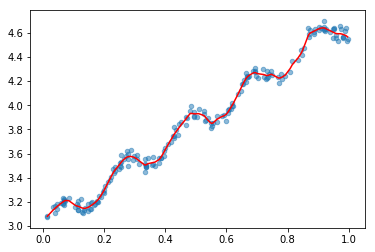

In [129]:
index=np.argsort(X.flatten())
plt.scatter(X,y,s=20,alpha=0.5)
plt.plot(X[index],y_predict[index],c='r')
plt.show()

绘制多条观察gamma的大小对曲线的影响

In [139]:
def changegamma(i,model,X,y,gamma):
    reg = model(gamma=gamma)
    reg.fit(X,y)
    y_predict = reg.predict(X)
    plt.subplot(3,1,i+1)
    plt.scatter(X,y,alpha=0.5)
    index=np.argsort(X.flatten())
    plt.plot(X[index],y_predict[index],c='r')
    plt.title("gamma={}".format(gamma))
    return 

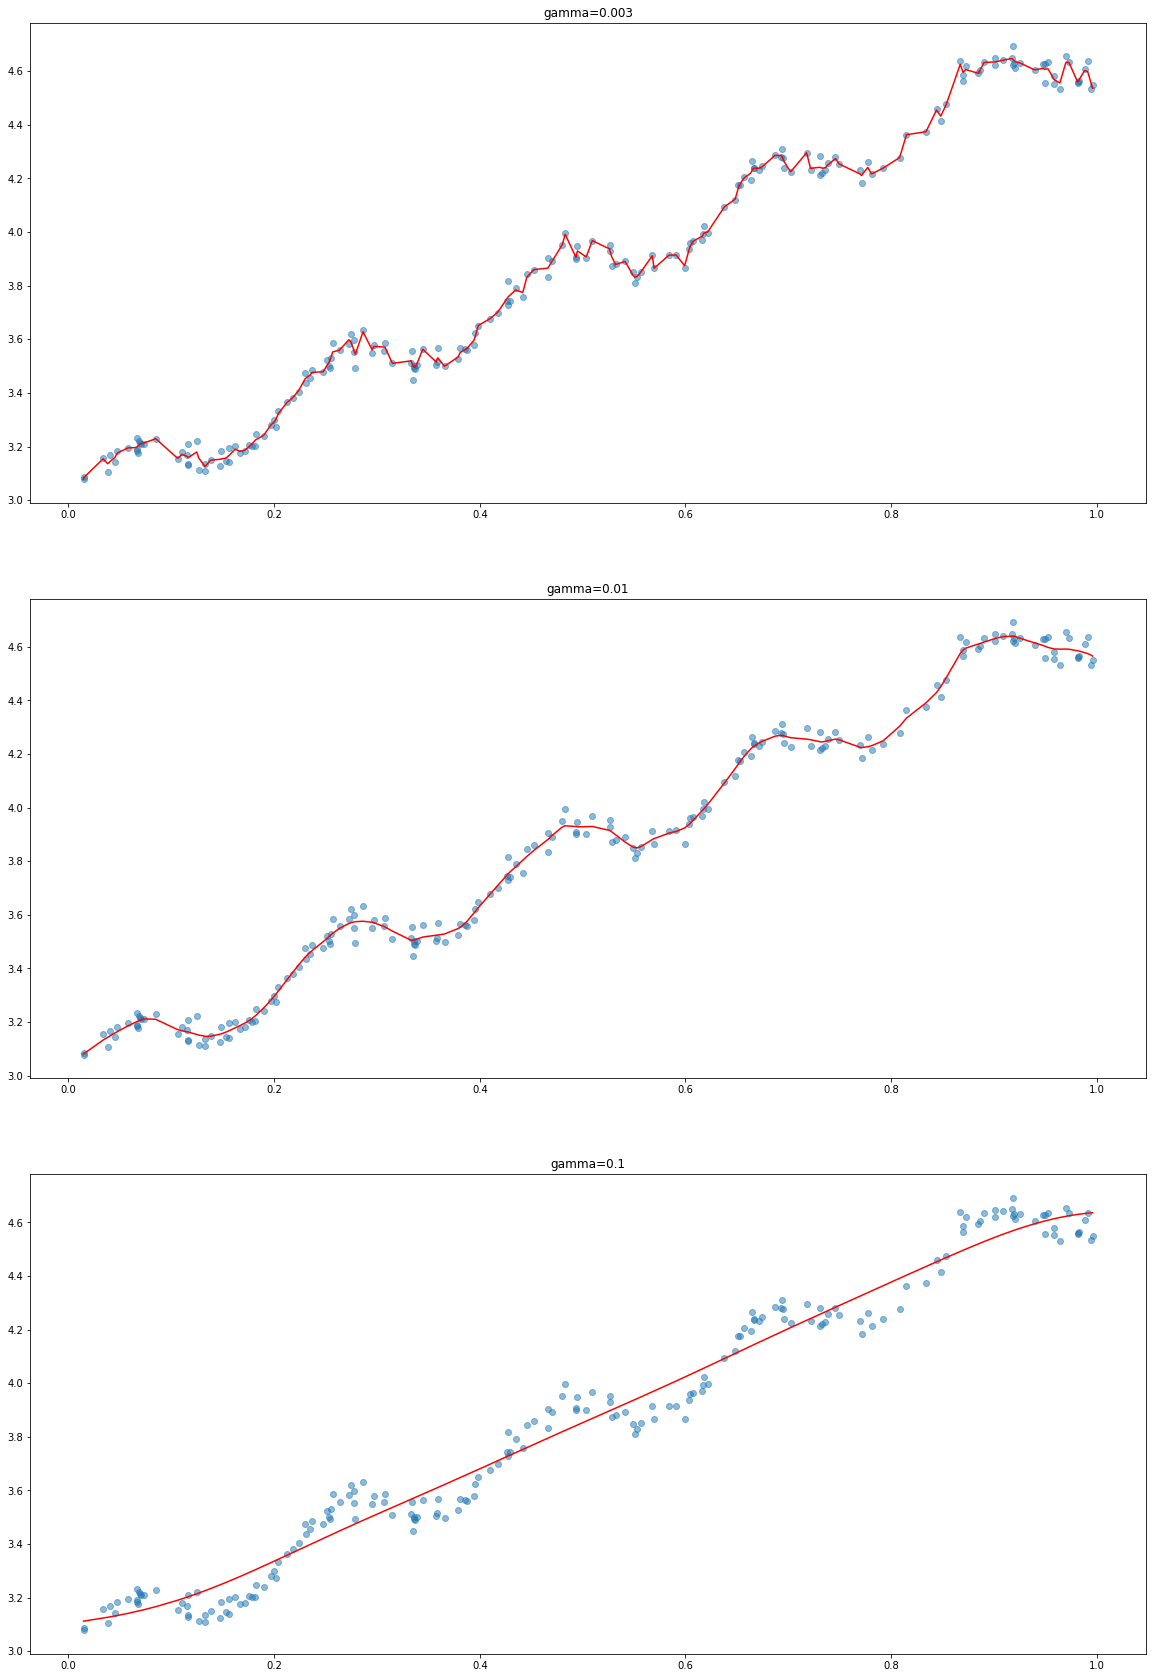

In [140]:
gammalist = [0.003,0.01,0.1]
plt.figure(figsize=(20,30))
for i in range(3):
    changegamma(i,LWLR,X,y,gammalist[i])